# Perceptron from scratch

$\hat{y} = f(\vec{w}\cdot \vec{x} + b) = f(w_1 x_1 + w_2 x_2 + \dots + w_nx_n + b)$

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.DataFrame(columns=('x1', 'x2'), data=np.random.uniform(size=(600,2)))
data.head()

,x1,x2
0,0.882494,0.964366
1,0.630311,0.628309
2,0.849369,0.284691
3,0.520905,0.093751
4,0.473206,0.800319


In [4]:
def compute_y(inputs):
    print(inputs)
    y = int(np.sum(inputs) > 1)
    return y
data['y'] = data.apply(compute_y, axis=1)

In [7]:
data

,x1,x2,y
0,0.882494,0.964366,1
1,0.630311,0.628309,1
2,0.849369,0.284691,1
3,0.520905,0.093751,0
4,0.473206,0.800319,1
...,...,...,...
595,0.863836,0.674028,1
596,0.309469,0.131267,0
597,0.362041,0.248114,0
598,0.187987,0.269461,0


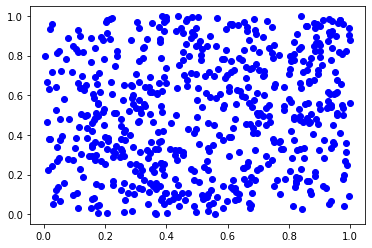

In [37]:
plt.scatter(data.x1, data.x2, color='blue')
#data[data.y==1].plot(kind='scatter', ax=ax, x='x1', y='x2', color='blue')
#data[data.y==0].plot(kind='scatter', ax=ax, x='x1', y='x2', color='red')

## Multilayer perceptron

How does Multilayer Perceptron work?
We can summarize the operation of the perceptron as follows it:

- Step 1: Initialize the weights and bias with small-randomized values;
- Step 2: Propagate all values in the input layer until output layer (Forward Propagation)
- Step 3: Update weight and bias in the inner layers (Backpropagation)
- Step 4: Do it until that the stop criterion is satisfied !